   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
Akurasi: 0.461671469740634

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.36      0.34      0.35        38
        ENFP       0.45      0.46      0.46       135
        ENTJ       0.24      0.26      0.25        46
        ENTP       0.40      0.35      0.38       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.17      0.11      0.13        18
        INFJ       0.52      0.47      0.49       294
        INFP       0.56      0.58      0.57       366

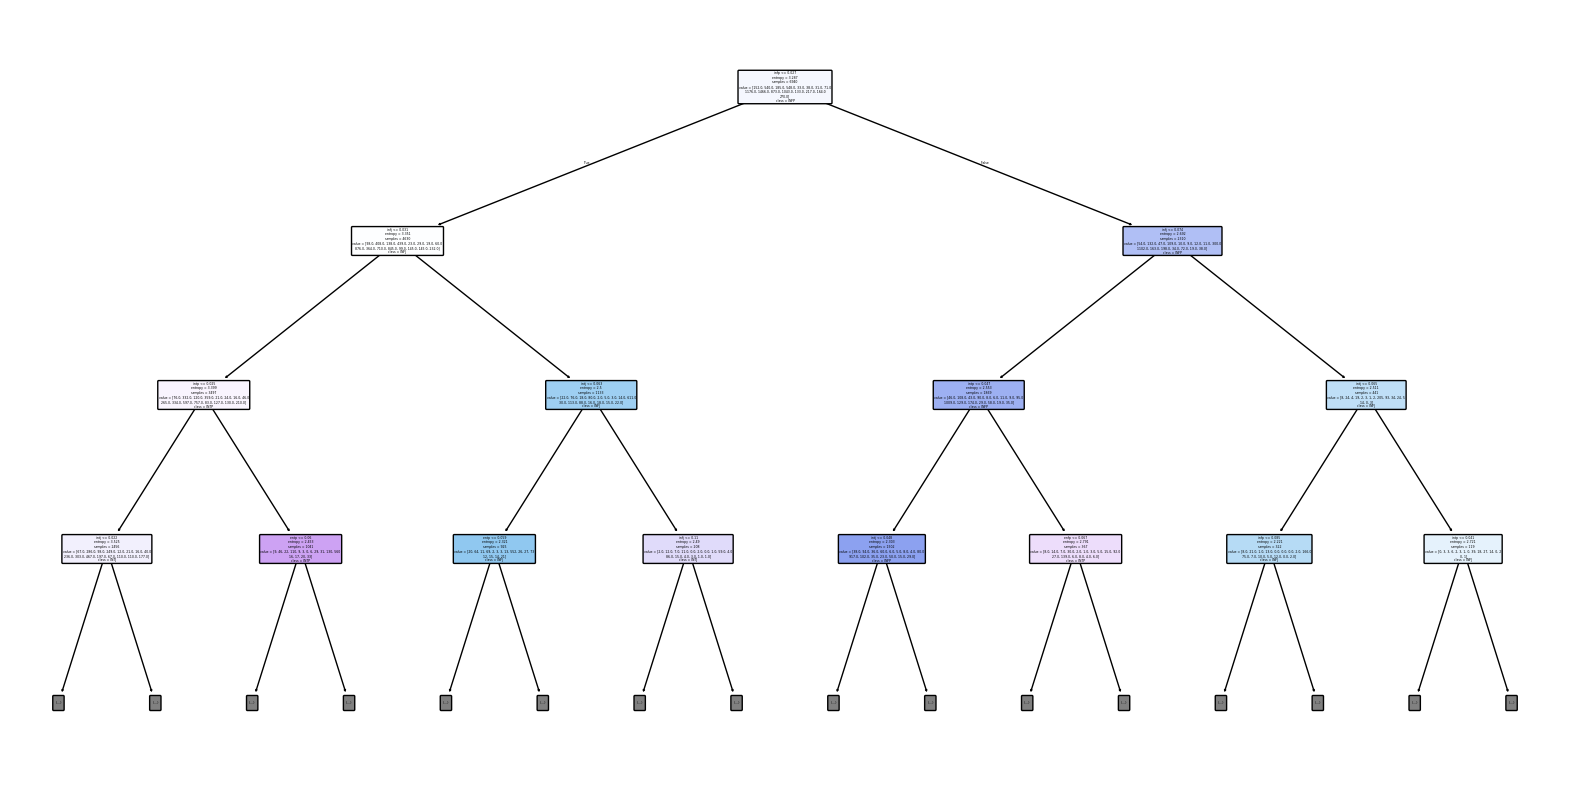

Prediksi tipe MBTI: INFP


In [7]:
# Import library penting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Load dataset
# Dataset MBTI berisi dua kolom: 'type' (label MBTI) dan 'posts' (teks postingan)
df = pd.read_csv('mbti_1.csv')

# Tampilkan 5 data awal untuk cek isi dataset
print(df.head())

# Step 2: Pisahkan fitur (X) dan label (y)
X_text = df['posts']  # Data teks yang akan diolah
y = df['type']        # Label tipe kepribadian MBTI

# Step 3: Bagi data menjadi train dan test (80% train, 20% test)
# stratify=y supaya proporsi tiap tipe MBTI seimbang di train dan test
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Ubah teks menjadi fitur numerik dengan TF-IDF
# TF-IDF mengukur pentingnya kata dalam teks relatif ke keseluruhan data
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_text)  # Fit dan transform data training
X_test = vectorizer.transform(X_test_text)        # Transform data testing

# Step 5: Buat dan latih model Decision Tree
# Decision Tree bekerja dengan membuat aturan keputusan dari fitur untuk memprediksi label
clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Prediksi label pada data test
y_pred = clf.predict(X_test)

# Step 7: Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualisasi sebagian pohon keputusan (batasi kedalaman agar jelas)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, max_depth=3, feature_names=vectorizer.get_feature_names_out(),
               class_names=clf.classes_, filled=True, rounded=True)
plt.show()

# Step 9: Fungsi untuk prediksi tipe MBTI dari teks baru
def predict_mbti(text):
    X_new = vectorizer.transform([text])  # Ubah teks jadi fitur TF-IDF
    pred = clf.predict(X_new)             # Prediksi tipe MBTI dengan model Decision Tree
    return pred[0]

# Contoh penggunaan fungsi prediksi
sample_text = "I enjoy working in teams and discussing ideas openly."
print("Prediksi tipe MBTI:", predict_mbti(sample_text))


In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import random

# 1. Buat data dummy
np.random.seed(42)
random.seed(42)

n_samples = 100
n_questions = 20
X_dummy = np.random.randint(1, 6, size=(n_samples, n_questions))

mbti_types = [
    'INTJ', 'INTP', 'ENTJ', 'ENTP',
    'INFJ', 'INFP', 'ENFJ', 'ENFP',
    'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ',
    'ISTP', 'ISFP', 'ESTP', 'ESFP'
]
y_dummy = [random.choice(mbti_types) for _ in range(n_samples)]

columns = [f'P{i+1}' for i in range(n_questions)]
df = pd.DataFrame(X_dummy, columns=columns)
df['MBTI'] = y_dummy

# 2. Split data training dan testing
X = df.drop('MBTI', axis=1)
y = df['MBTI']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Buat dan latih Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 4. Input manual dari pengguna
jawaban_user = []
for i in range(1, 21):
    while True:
        try:
            nilai = int(input(f"Jawaban untuk P{i} (1-5): "))
            if 1 <= nilai <= 5:
                jawaban_user.append(nilai)
                break
            else:
                print("Masukkan angka antara 1 sampai 5.")
        except ValueError:
            print("Masukkan angka yang valid.")

# 5. Prediksi hasil
jawaban_user = [jawaban_user]  # format harus list dalam list
hasil = clf.predict(jawaban_user)[0]
print("\nPrediksi MBTI kamu:", hasil)


Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
Masukkan angka yang valid.
M